# Train the model

worry: 0
happy: 1
sad: 2
love: 3
surprise: 4

In [1]:
import numpy as np
import pandas as pd

import nltk , re, string, random
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')

from sklearn.feature_extraction.text import TfidfVectorizer

from nltk import classify, NaiveBayesClassifier

In [2]:
# initial data
# df = pd.read_csv("aug_emotion_data.csv")
# tokenize + remove noise
# df = pd.read_csv("aug_emotion_clean_data.csv")
# drop_duplicates
df = pd.read_csv("aug_emotion_clean_data_v2.csv")

In [3]:
df.head()

,clean_content,sentiment_id
0,rt anxiety might represent crushing faith char...,0
1,pump interview nervous,0
2,bos tell today vacation next week notion anoth...,4
3,could feel humiliated bn detachment realize ne...,2
4,even anti semitism literary figure like hilair...,0


In [4]:
df.shape

(522333, 2)

In [5]:
# Shuffle the data
df = df.sample(frac=1)

In [6]:
# # Mapping dictionary
# sentiment_mapping = {0: 'worry', 1: 'happy', 2: 'sad', 3: 'love', 4: 'surprise'}

# # Create a new column based on the mapping
# df['sentiment-name'] = df['sentiment_id'].map(sentiment_mapping)

# # Print the updated DataFrame
# df.head()

In [7]:
df.shape

(522333, 2)

## Drop NAN values

In [8]:
missing_counts = df.isnull().sum()
missing_counts

clean_content    153
sentiment_id       0
dtype: int64

In [9]:
# Drop NAN values
df = df.dropna()

In [10]:
missing_counts = df.isnull().sum()
missing_counts

clean_content    0
sentiment_id     0
dtype: int64

In [11]:
# Filter the rows based on the condition
rows_to_delete = df[(df['sentiment_id'] == 1) | (df['sentiment_id'] == 2)]

# Delete the filtered rows
# Delete 15,000 rows
rows_to_delete = rows_to_delete.sample(n=150000)  # Randomly select 150,000 rows
df = df.drop(rows_to_delete.index)

# Confirm the deletion
print("Number of rows deleted:", len(rows_to_delete))

Number of rows deleted: 150000


In [12]:
df.shape

(372180, 2)

In [13]:
# take the first 200k rows
df = df.head(200000)

## Visualisation 

C:\Users\Honor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment_id', ylabel='count'>

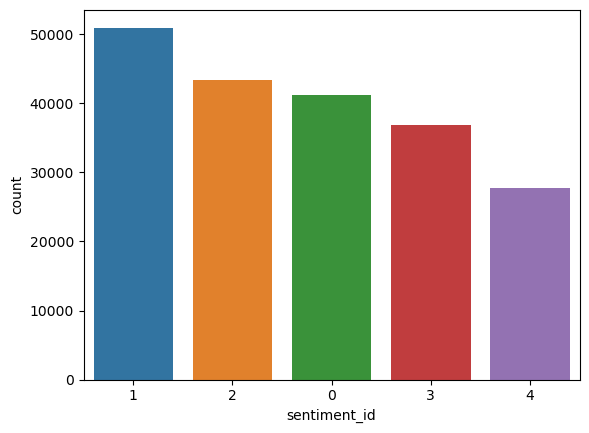

In [14]:
# Visualise banlance of data
import seaborn as sns
sns.countplot(df['sentiment_id'],order = df['sentiment_id'].value_counts(normalize=True).index)

# Convert the cleaned text into a numerical representation.

## CountVectorizer

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

preprocessed_data = df['clean_content']
count_vectorizer = CountVectorizer()

processed_features = count_vectorizer.fit_transform(preprocessed_data)

labels = df['sentiment_id']

## TF-IDF

In [ ]:
# vectorizer = TfidfVectorizer (min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
df.head()

In [ ]:
# define list of preprocessed text data
# preprocessed_data = df['syn_content'].apply(' '.join)

preprocessed_data = df['clean_content']
tfidf_vectorizer = TfidfVectorizer()

processed_features = tfidf_vectorizer.fit_transform(preprocessed_data)

In [ ]:
# df_tfidf = pd.DataFrame(processed_features.toarray(), columns = tfidf_vectorizer.get_feature_names_out())
# len(tfidf_vectorizer.get_feature_names_out())

In [ ]:
len(preprocessed_data)

In [ ]:
# transform labels:
labels = df['sentiment_id']
# vectorizer_labels = TfidfVectorizer()

# processed_labels = vectorizer_labels.fit_transform(labels)

In [ ]:
# df_tfidf_label = pd.DataFrame(processed_labels.toarray(), columns = vectorizer_labels.get_feature_names_out())

In [ ]:
# df_tfidf

### Trainning

In [16]:
labels.shape

(200000,)

In [17]:
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define a list of algorithms to iterate over
algorithms = [
    LogisticRegression(max_iter=1000),
#     svm.SVC(kernel='linear', degree=2, C=10),
    xgb.XGBClassifier(use_label_encoder=False,
                      objective='multi:softmax',
                      num_class=5,
                      eval_metric=['merror', 'mlogloss'],
                      seed=42),
    RandomForestClassifier()
]

# Define an empty dictionary to store the model accuracies
model_accuracies = {}

# Iterate over the algorithms and train each model
for algorithm in algorithms:
    algorithm_name = algorithm.__class__.__name__
    model = algorithm.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[accuracy] = algorithm
    print(f"{algorithm_name} Accuracy: {accuracy}")

# Print the model accuracies
print("\nModel Accuracies:")
for accuracy, algorithm in model_accuracies.items():
    print(f"{algorithm.__class__.__name__}: {accuracy}")

# Evaluate the best performing model using classification report
best_accuracy = max(model_accuracies)
best_model = model_accuracies[best_accuracy]
y_pred_best = best_model.predict(X_test)
report = classification_report(y_test, y_pred_best)
print("\nBest Performing Model:")
print(f"Model: {best_model.__class__.__name__}")
print("Classification Report:")
print(report)


C:\Users\Honor\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


LogisticRegression Accuracy: 0.840075
XGBClassifier Accuracy: 0.72925


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNN classifier with the desired parameters
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_knn = knn.predict(X_test)

# Calculate the accuracy of the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Print the accuracy
print(f"KNN Accuracy: {accuracy_knn}")

# Add the KNN model accuracy to the dictionary of model accuracies
model_accuracies[accuracy_knn] = knn

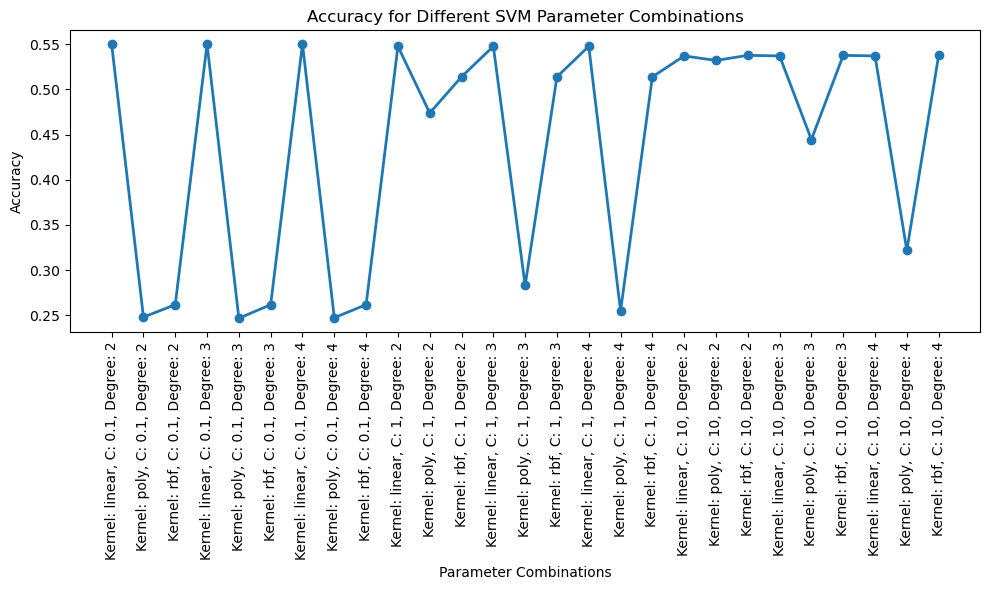

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Define the SVM model
svm_model = svm.SVC(decision_function_shape='ovr')

# Define the parameter grid to search over
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the grid search results
results = grid_search.cv_results_
params = results['params']
mean_scores = results['mean_test_score']

# Extract parameter values
kernels = [param['kernel'] for param in params]
C_values = [param['C'] for param in params]
degrees = [param['degree'] for param in params]

# Create a unique identifier for each parameter combination
labels = [f"Kernel: {k}, C: {C}, Degree: {d}" for k, C, d in zip(kernels, C_values, degrees)]

# Create a line plot to compare accuracy for different parameter combinations
x = np.arange(len(labels))
plt.figure(figsize=(10, 6))
plt.plot(x, mean_scores, marker='o', linestyle='-', linewidth=2)
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Parameter Combinations')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different SVM Parameter Combinations')
plt.tight_layout()
plt.show()


TypeError: Invalid shape (3,) for image data

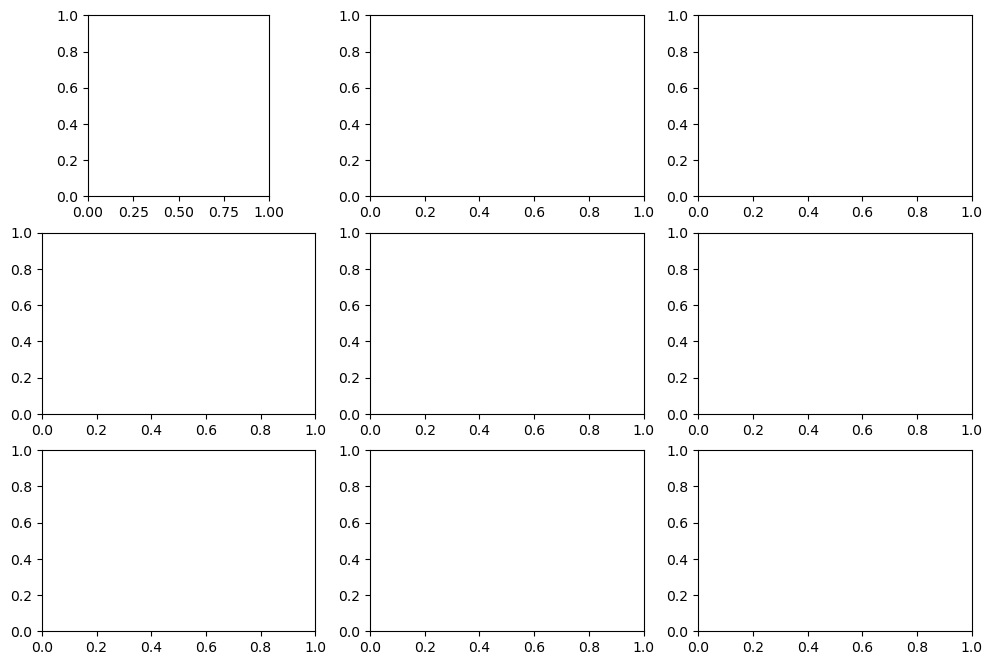

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Define the SVM model
svm_model = svm.SVC(decision_function_shape='ovr')

# Define the parameter grid to search over
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the grid search results
results = grid_search.cv_results_
params = results['params']
mean_scores = results['mean_test_score']

# Extract parameter values
kernels = [param['kernel'] for param in params]
C_values = [param['C'] for param in params]
degrees = [param['degree'] for param in params]

# Create a unique identifier for each parameter combination
labels = [f"Kernel: {k}, C: {C}, Degree: {d}" for k, C, d in zip(kernels, C_values, degrees)]

# Reshape the mean scores into a grid
mean_scores_grid = np.array(mean_scores).reshape(len(param_grid['kernel']), len(param_grid['C']), len(param_grid['degree']))

# Plotting the grid of mean scores
fig, ax = plt.subplots(len(param_grid['kernel']), len(param_grid['C']), figsize=(12, 8))
for i, kernel in enumerate(param_grid['kernel']):
    for j, C in enumerate(param_grid['C']):
        ax[i, j].imshow(mean_scores_grid[i, j, :], cmap='viridis', vmin=np.min(mean_scores), vmax=np.max(mean_scores))
        ax[i, j].set_xticks(np.arange(len(param_grid['degree'])))
        ax[i, j].set_yticks(np.arange(len(mean_scores_grid[i, j, :])))
        ax[i, j].set_xticklabels(param_grid['degree'])
        ax[i, j].set_yticklabels(mean_scores_grid[i, j, :])
        ax[i, j].set_title(f"Kernel: {kernel}, C: {C}")
        for k in range(len(param_grid['degree'])):
            for l in range(len(mean_scores_grid[i, j, :])):
                text = ax[i, j].text(l, k, "%.3f" % mean_scores_grid[i, j, k, l], ha='center', va='center', color='w')
plt.tight_layout()
plt.show()


In [29]:
from sklearn.linear_model import LogisticRegression

# Train with Logistic Reression 
model_LR = LogisticRegression(max_iter=1000)

model_LR.fit(X_train, y_train)

y_pred = model_LR.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)
# 0.8067

(80000, 2)
Accuracy: 0.790375


In [27]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.80      0.73      4162
           1       0.89      0.82      0.85      5105
           2       0.91      0.80      0.85      4340
           3       0.82      0.88      0.85      3649
           4       0.74      0.71      0.73      2744

    accuracy                           0.81     20000
   macro avg       0.81      0.80      0.80     20000
weighted avg       0.82      0.81      0.81     20000



## SVM

In [ ]:
import sklearn.model_selection as model_selection
from sklearn.metrics import f1_score

from sklearn import svm
poly = svm.SVC(kernel='linear', degree=2, C=10).fit(X_train, y_train)
poly_pred = poly.predict(X_test)

poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

# rbf_accuracy = accuracy_score(y_test, rbf_pred)
# rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
# print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
# print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

In [90]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier(use_label_encoder=False,
                            objective='multi:softmax', 
                            num_class=5,   
                            eval_metric=['merror','mlogloss'], 
                            seed=42)

model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

Accuracy: 0.72085


## RD

In [85]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)

y_pred = model_RF.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

Accuracy: 0.8304


In [86]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.84      0.77      4211
           1       0.88      0.81      0.84      5073
           2       0.91      0.77      0.83      4281
           3       0.82      0.93      0.87      3700
           4       0.89      0.82      0.86      2735

    accuracy                           0.83     20000
   macro avg       0.84      0.83      0.83     20000
weighted avg       0.84      0.83      0.83     20000



# save trained model

In [1]:
# Import the library
from sklearn import model_selection, datasets
import joblib
import pickle

In [33]:
# Saving the model
filename = "./SavedModels/100k/SVM_PreProcessed_100kSamples_model_v1.joblib"
# joblib.dump(model_LR, filename)

In [34]:
# Loading the saved model
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

ValueError: X has 46035 features, but SVC is expecting 45239 features as input.

In [143]:
processed_features

<100000x45680 sparse matrix of type '<class 'numpy.float64'>'
	with 853407 stored elements in Compressed Sparse Row format>

In [203]:
X_test[13].shape

(1, 45680)

In [219]:
y_pred = model_LR.predict(X_test[2])

In [220]:
y_pred

array([3], dtype=int64)